# **Data Processing For Machine Learning**

In [1]:
!pip install ydata-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 33.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=3d8e5946dc5323bb788a225709f56842f606dad96081f5ca41bdabdbe3dd0b6b
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cec

In [2]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [3]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler


%config InlineBackend.figure_format = 'retina'
sns.set(
    style='ticks', 
    context='talk', 
    font_scale=0.8, 
    rc={'figure.figsize': (8,6)}
)

seed = 60
random.seed(seed)
np.random.seed(seed)

In [4]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=124sfwX5V1RhsApypyDOwHYurGbifhzqW")
df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [5]:
# report = ProfileReport(df=df, title="AML FInal Report", explorative=True)
# report.to_notebook_iframe()

In [6]:
over_2m = df.query('price > 2e6')
print(over_2m.shape)
over_2m.head()

(16, 12)


,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
51741,202002257718775,4400.0,14,Black,Bugatti,Veyron,USED,2014.0,2850000,Coupe,False,Petrol
64910,202006039766650,189.0,NaN,Black,McLaren,P1,USED,NaN,2695000,Coupe,False,Petrol Plug-in Hybrid
72681,202007010711087,475.0,15,Yellow,Ferrari,LaFerrari,USED,2015.0,2299950,Coupe,False,Petrol
94033,202007020778467,1900.0,18,White,Pagani,Huayra,USED,NaN,2400000,Convertible,False,Petrol
141833,202007050883898,87450.0,NaN,Red,Ferrari,250,USED,NaN,9999999,Coupe,False,Petrol


# **Feature Engineering**

In [7]:
# remove public reference
clean_df = df.drop(['public_reference', 'standard_model', 'reg_code'], axis=1)

# remove price=9999999
clean_df = clean_df[clean_df['price'] != 9_999_999]

# remove mileage=9999999
clean_df = clean_df[clean_df['mileage'] != 999_999]
clean_df = clean_df[~clean_df['mileage'].isna()]

clean_df.loc[:, 'mileage'] = clean_df['mileage'].astype(float)
clean_df.loc[:, 'crossover_car_and_van'] = clean_df['crossover_car_and_van'].astype(str)

# Get the 'standard_colour' column from the given DataFrame
vehicle_colors = clean_df['standard_colour']
# Create a boolean mask to filter out missing values
na_mask = vehicle_colors.isna()
colors = vehicle_colors[~na_mask].tolist()

clean_df['standard_colour'] = clean_df['standard_colour'].map(lambda x: random.choice(colors) if pd.isna(x) else x)

clean_df['year_of_registration'][clean_df['vehicle_condition'] == "NEW"] = 2023

clean_df = clean_df[~clean_df['year_of_registration'].isna()]
clean_df = clean_df[~clean_df['year_of_registration'].isin(range(0, 1921))]
clean_df.loc[:, 'year_of_registration'] = clean_df['year_of_registration'].astype(int)

# clean_df['reg_code'][(clean_df['reg_code'].isna()) & (clean_df['year_of_registration'] == 2023)] = 23
# clean_df = clean_df[~clean_df['reg_code'].isna()]

clean_df = clean_df[~clean_df['body_type'].isna()]

clean_df = clean_df[~clean_df['fuel_type'].isna()]

print(clean_df.shape)
clean_df.head()

<ipython-input-7-bccb71e2244a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.loc[:, 'mileage'] = clean_df['mileage'].astype(float)
<ipython-input-7-bccb71e2244a>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['year_of_registration'][clean_df['vehicle_condition'] == "NEW"] = 2023
<ipython-input-7-bccb71e2244a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

(398870, 9)


,mileage,standard_colour,standard_make,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,0.0,Grey,Volvo,NEW,2023,73970,SUV,False,Petrol Plug-in Hybrid
1,108230.0,Blue,Jaguar,USED,2011,7000,Saloon,False,Diesel
2,7800.0,Grey,SKODA,USED,2017,14000,SUV,False,Petrol
3,45000.0,Brown,Vauxhall,USED,2016,7995,Hatchback,False,Diesel
4,64000.0,Grey,Land Rover,USED,2015,26995,SUV,False,Diesel


In [8]:
# report = ProfileReport(df=clean_df, title="After Cleaning Data", explorative=True)
# report.to_notebook_iframe()

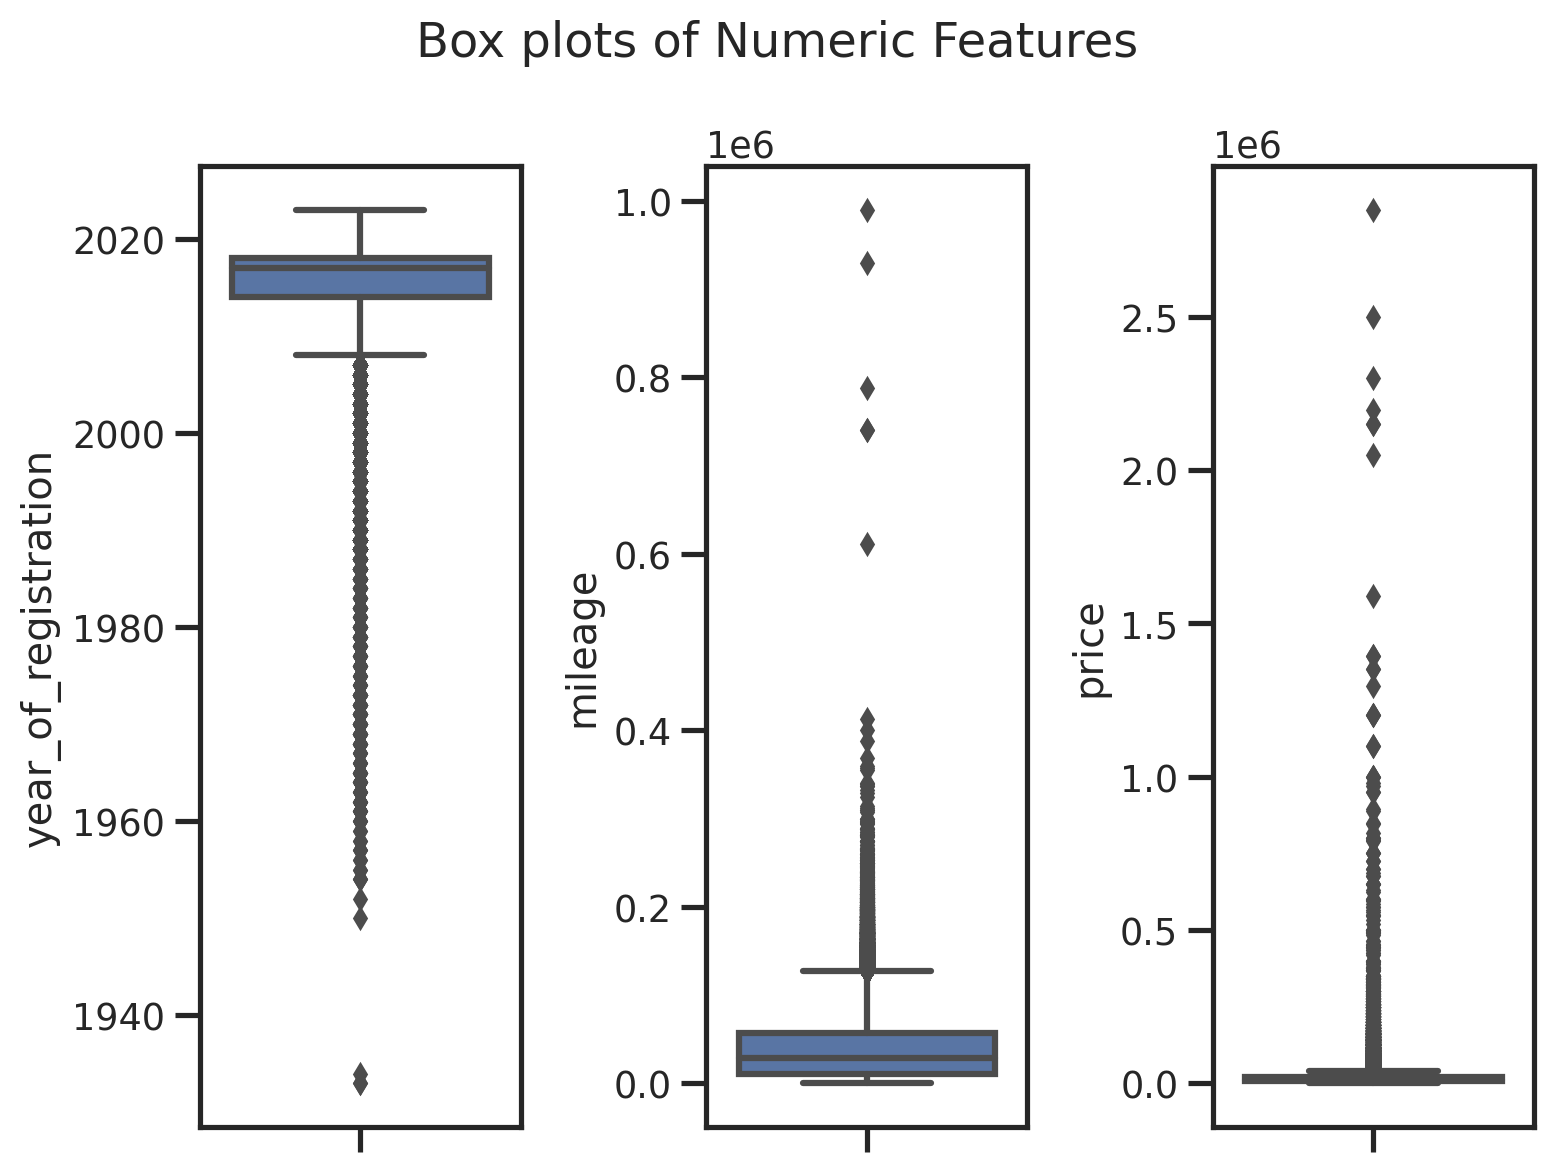

In [9]:
numeric_cols = ['mileage', 'price']
fig, ax = plt.subplots(ncols=3)
sns.boxplot(clean_df, y='year_of_registration', ax=ax[0])
sns.boxplot(clean_df, y='mileage', ax=ax[1])
sns.boxplot(clean_df, y='price', ax=ax[2])
plt.suptitle("Box plots of Numeric Features")
plt.tight_layout()


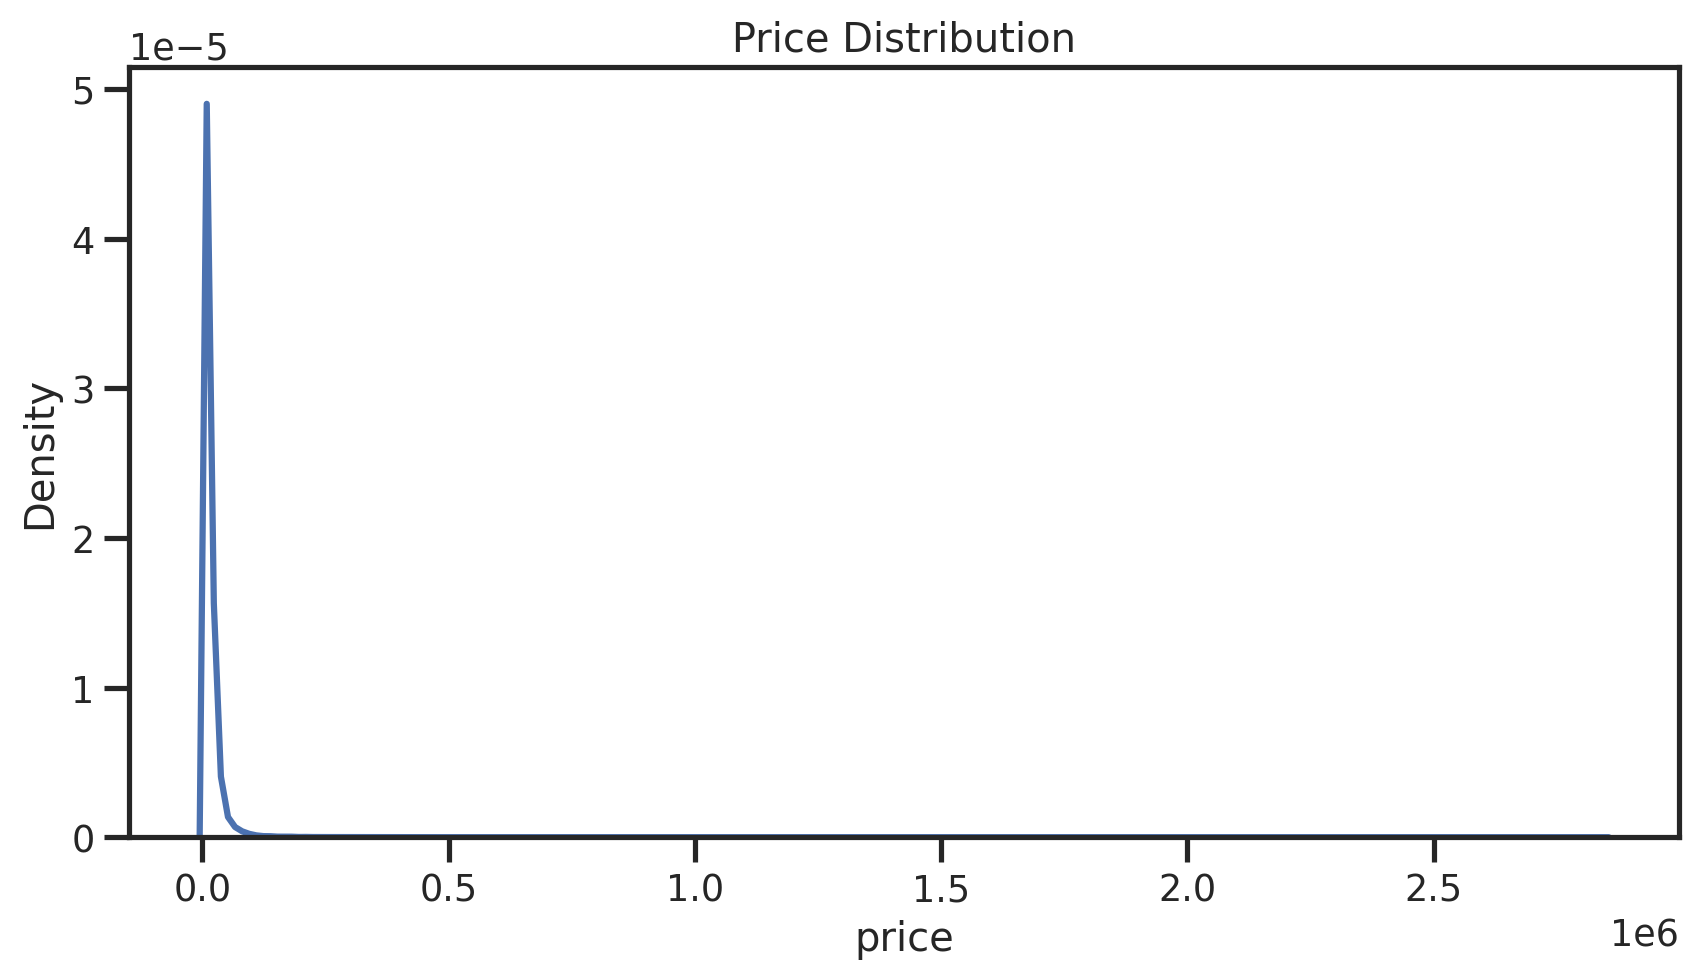

In [10]:
plt.figure(figsize=(10, 5))
sns.kdeplot(clean_df[numeric_cols], x='price')
plt.title("Price Distribution")
plt.savefig("")

# **Feature Selection and Dimensionality Reduction**

In [11]:
scaler = StandardScaler()
numeric_cols = ['mileage', 'year_of_registration', 'price']
scaled_num = scaler.fit_transform(clean_df[numeric_cols])

X = clean_df.drop('price', axis=1)
X['mileage'] = scaled_num[:, 0]
X['year_of_registration'] = scaled_num[:, 1]

y = scaled_num[:, 2]

In [12]:
X.head()

,mileage,standard_colour,standard_make,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type
0,-1.086376,Grey,Volvo,NEW,1.569499,SUV,False,Petrol Plug-in Hybrid
1,2.024252,Blue,Jaguar,USED,-1.002011,Saloon,False,Diesel
2,-0.862197,Grey,SKODA,USED,0.283744,SUV,False,Petrol
3,0.206965,Brown,Vauxhall,USED,0.069452,Hatchback,False,Diesel
4,0.753042,Grey,Land Rover,USED,-0.144841,SUV,False,Diesel


In [13]:
X = pd.get_dummies(X)
X.head()

,mileage,year_of_registration,standard_colour_Beige,standard_colour_Black,standard_colour_Blue,standard_colour_Bronze,standard_colour_Brown,standard_colour_Burgundy,standard_colour_Gold,standard_colour_Green,...,crossover_car_and_van_True,fuel_type_Bi Fuel,fuel_type_Diesel,fuel_type_Diesel Hybrid,fuel_type_Diesel Plug-in Hybrid,fuel_type_Electric,fuel_type_Natural Gas,fuel_type_Petrol,fuel_type_Petrol Hybrid,fuel_type_Petrol Plug-in Hybrid
0,-1.086376,1.569499,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.024252,-1.002011,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,-0.862197,0.283744,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.206965,0.069452,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.753042,-0.144841,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# **MODEL BUILDING**
*   Linear Model
*   Random Forest
*   Boosted Tree
*   Light GBM : Extra
*   Averager/Voter/Stacker Ensemble - I chose Averager













In [14]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

# Print the shape of the train and test sets
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (319096, 158)
X_test shape:  (79774, 158)
y_train shape:  (319096,)
y_test shape:  (79774,)


**Linear Regression Model**

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_recall_fscore_support

# We will create a Linear Regression model object
lr_model = LinearRegression()

# Then here we train the model 
lr_model.fit(X_train, y_train)

# Then, we predict the target variable model we trained above
y_pred = lr_model.predict(X_test)

In [16]:
y_pred

array([-0.14553737, -0.56337729,  0.11060696, ...,  0.14093772,
       -0.1159312 , -0.17476165])

In [17]:
y_test

array([-0.24141814, -0.46871322,  0.06301404, ..., -0.16886895,
       -0.21590587, -0.13207982])

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
# To get my mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: %.2f" % mse)

# For the root mean squared error
rmse = np.sqrt(mse)
print("Root mean squared error: %.2f" % rmse)

# coefficient of determination (R-squared)
r2 = r2_score(y_test, y_pred)
print("Coefficient of determination (R-squared): %.2f" % r2)

Mean squared error: 0.30
Root mean squared error: 0.55
Coefficient of determination (R-squared): 0.59


**Random Forest Model**

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Creating the Random Forest regressor object with 40 trees
rf_model = RandomForestRegressor(n_estimators=40, random_state=60)

# Let's Train the model on the training data
rf_model.fit(X_train, y_train)

# Then we Predict the target variable using the trained model
y_pred = rf_model.predict(X_test)


In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicting the target variable using the trained Random Forest model
y_pred = rf_model.predict(X_test)

# Calculating my mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: %.2f" % mse)

# To calculate the root mean squared error
rmse = np.sqrt(mse)
print("Root mean squared error: %.2f" % rmse)

# Coefficient of determination (R-squared)
r2 = r2_score(y_test, y_pred)
print("Coefficient of determination (R-squared): %.2f" % r2)


Mean squared error: 0.23
Root mean squared error: 0.48
Coefficient of determination (R-squared): 0.69


**Boosted Tree Model**

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# To create the Gradient Boosting regressor object
gb_model = GradientBoostingRegressor(n_estimators=40, learning_rate=0.1, random_state=60)

# Training the model with the training data
gb_model.fit(X_train, y_train)

# Here we predict the target variable using the trained model
y_pred = gb_model.predict(X_test)

# We evaluate the performance 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: %.2f" % mse)
print("Root mean squared error: %.2f" % rmse)
print("Coefficient of determination (R-squared): %.2f" % r2)


Mean squared error: 0.30
Root mean squared error: 0.54
Coefficient of determination (R-squared): 0.60


**LightGBM Model**

In [22]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import lightgbm as lgb

# This is a new model, really cool. 
# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set the hyperparameters for the model
params = {
    "objective": "regression",
    "metric": "rmse",
    "num_leaves": 31,
    "learning_rate": 0.05,
}

# Training the model on with training data
lgb_model = lgb.train(params, train_data, num_boost_round=100)

# To predict the target variable with the trained model
y_pred = lgb_model.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 523
[LightGBM] [Info] Number of data points in the train set: 319096, number of used features: 105
[LightGBM] [Info] Start training from score 0.000162


In [24]:
# Here, we predict the target variable with the trained model
y_pred = lgb_model.predict(X_test)

# Evaluate the performance 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: %.2f" % mse)
print("Root mean squared error: %.2f" % rmse)
print("Coefficient of determination (R-squared): %.2f" % r2)

Mean squared error: 0.24
Root mean squared error: 0.49
Coefficient of determination (R-squared): 0.68


**An Averager/Voter/Stacker Ensemble**

In [25]:

# Creating a list of models to use in the ensemble
models = [rf_model,
          gb_model,
          lr_model]

# Train each model on the training data and make predictions on the test data
predictions = []
for model in models:
    y_pred = model.predict(X_test)
    predictions.append(y_pred)

# Computing the average of the predictions
average_predictions = np.mean(predictions, axis=0)

# We compute the root mean squared error based on the averager predictions
rmse = np.sqrt(mean_squared_error(y_test, average_predictions))
print("Ensemble RMSE: {:.2f}".format(rmse))

# We compute the majority vote of the predictions
vote_predictions = np.round(np.mean(predictions, axis=0))

# We Compute the root mean squared error of the majority vote's predictions
rmse = np.sqrt(mean_squared_error(y_test, vote_predictions))
print("Majority Vote RMSE: {:.2f}".format(rmse))

# Here we will create a new dataset from the predictions and use it to train a meta-model (advanced)
# I really don't need this step, But let's see
stacked_dataset = np.column_stack(predictions)
meta_model = LinearRegression()
meta_model.fit(stacked_dataset, y_test)

# We make predictions with the stacked model
stacked_predictions = meta_model.predict(stacked_dataset)

# Finally. Computing the root mean squared error of the stacked model's predictions
rmse = np.sqrt(mean_squared_error(y_test, stacked_predictions))
print("Stacked Model RMSE: {:.2f}".format(rmse))


Ensemble RMSE: 0.46
Majority Vote RMSE: 0.55
Stacked Model RMSE: 0.44


In [26]:
from sklearn.ensemble import VotingRegressor
from sklearn import metrics
enble_model = VotingRegressor([gb_model,lr_model])


In [27]:
estimators = [('gb', gb_model), ('lr', lr_model)]
enble_model = VotingRegressor(estimators)

# **MODEL EVALUATION AND ANALYSIS**


* Overall Performance with Cross-Validation
* True vs Predicted Analysis
* Global and Local Explanations with SHAP
* Partial Dependency Plots





**Overall Performance with Cross-Validation**

In [28]:
#LInear model
from sklearn.model_selection import cross_val_score
from sklearn import metrics
result = cross_val_score( lr_model, X_train, y_train, cv=5, scoring='r2')
result

array([-3.07834745e+15,  5.69733780e-01, -5.47851404e+14,  4.89956444e-01,
        5.55501405e-01])

In [29]:
#The Boosted Tree model
from sklearn import metrics
result = cross_val_score( gb_model, X_train, y_train, cv=5, scoring='r2')
result

array([0.47280835, 0.58396908, 0.58407736, 0.63075761, 0.62191164])

In [30]:
#my Random Forest model
from sklearn import metrics
from sklearn.model_selection import cross_val_score
result = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
result


array([0.64259594, 0.713573  , 0.75093412, 0.77949902, 0.74459367])

**True vs Predicted Analysis**

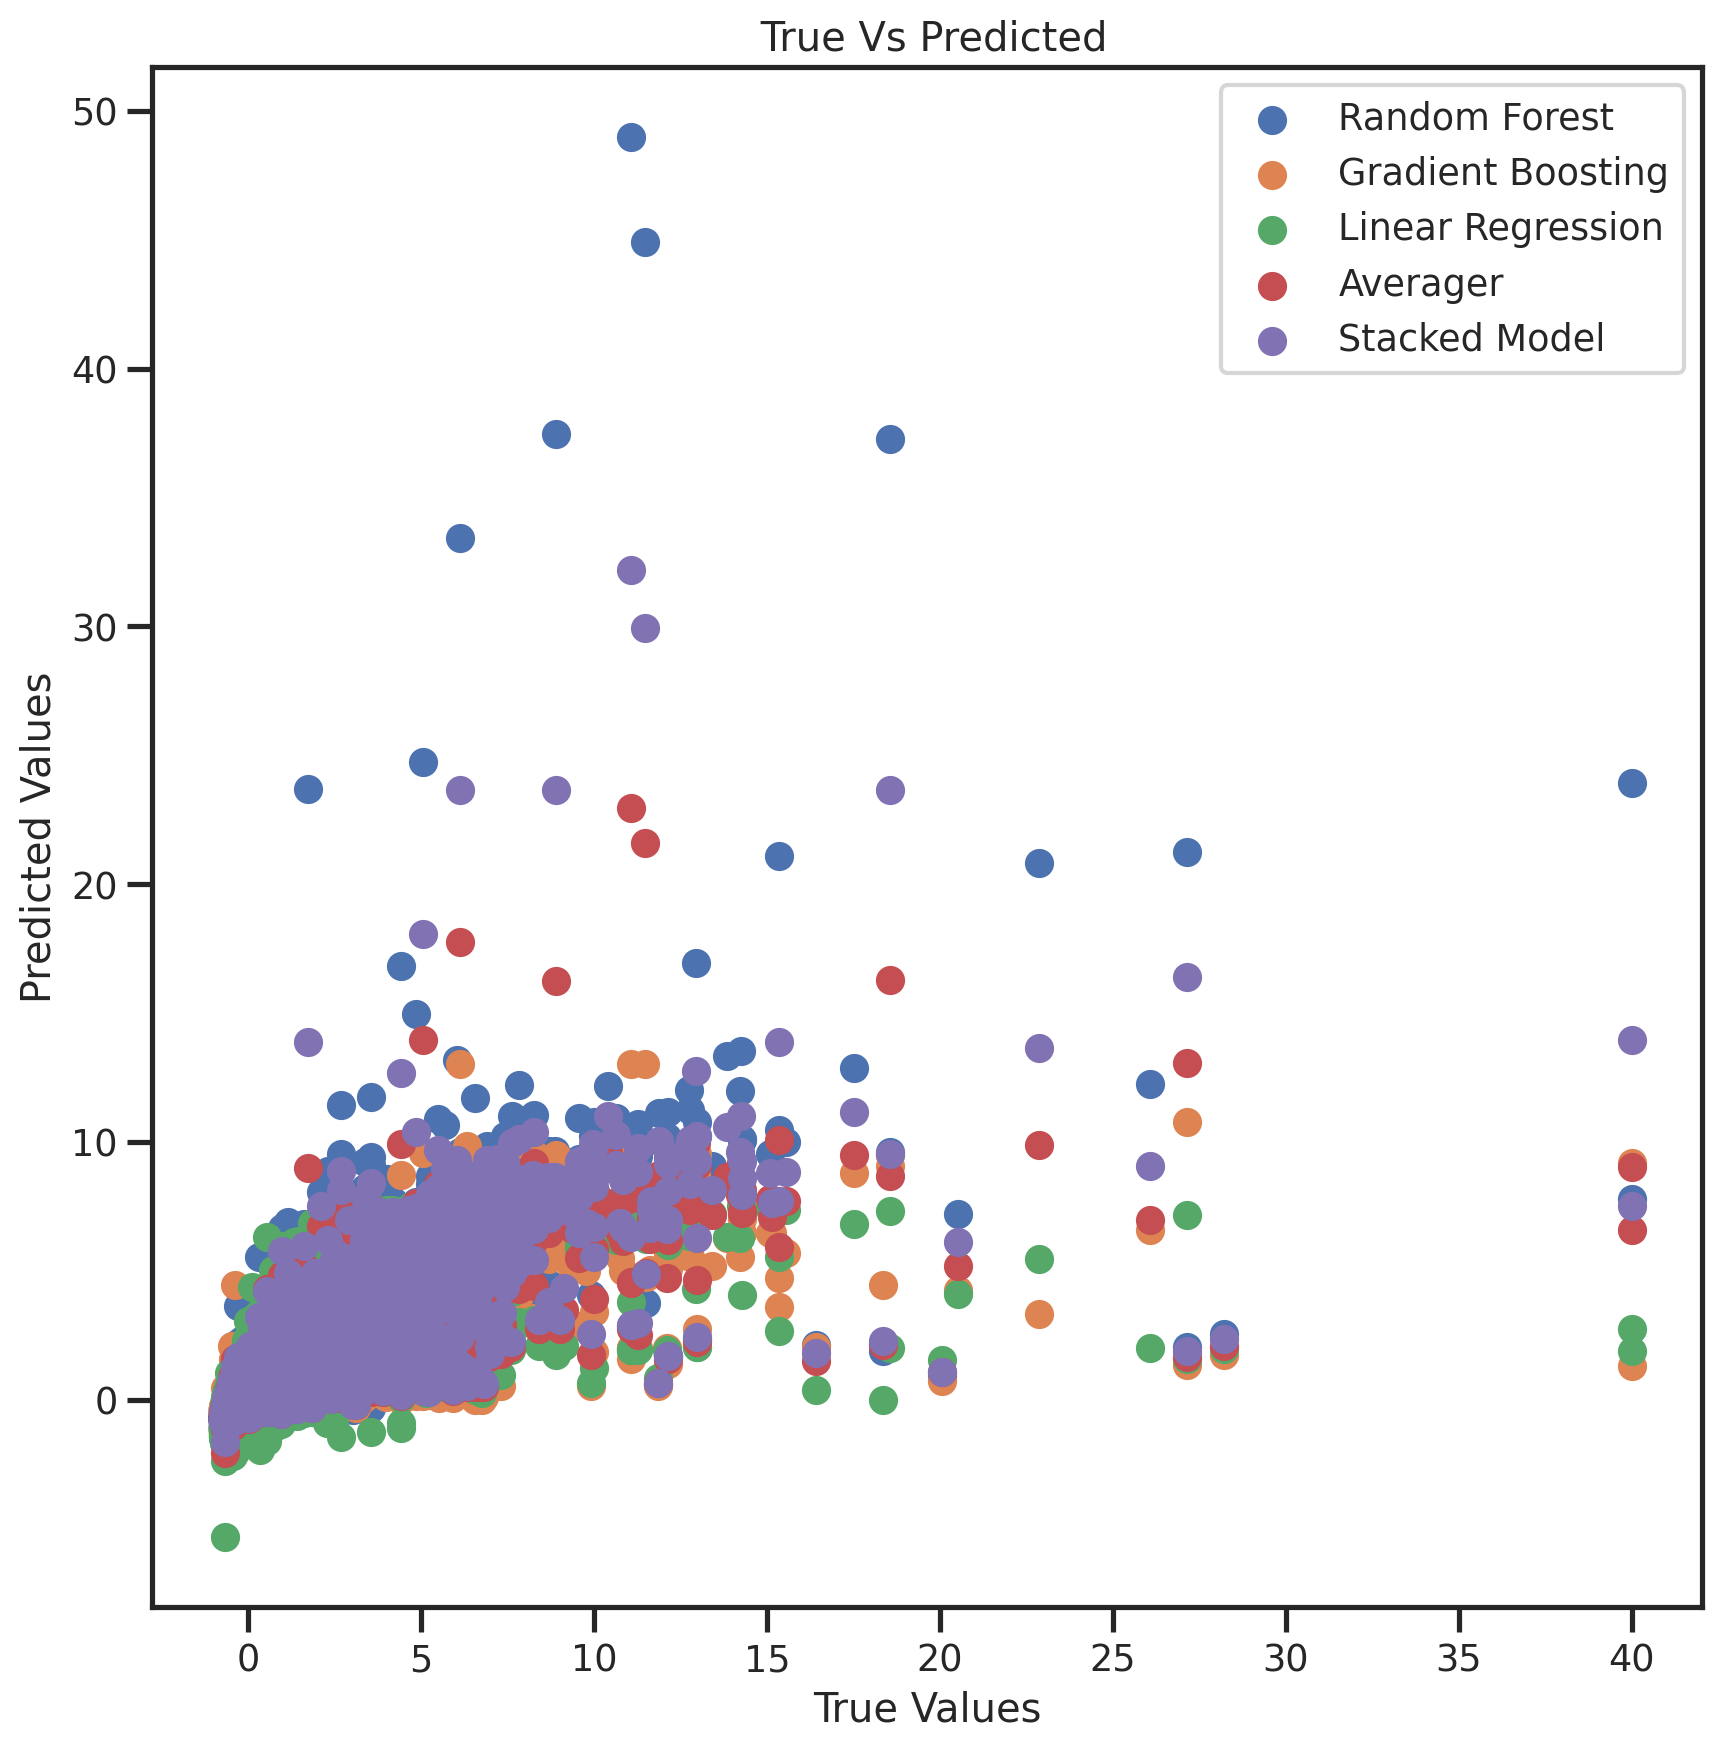

In [31]:
    # Plot true vs predicted values for each model and the ensemble
    plt.figure(figsize=(10, 10))
    plt.scatter(y_test, predictions[0], label="Random Forest")
    plt.scatter(y_test, predictions[1], label="Gradient Boosting")
    plt.scatter(y_test, predictions[2], label="Linear Regression")
    plt.scatter(y_test, average_predictions, label="Averager")
    plt.scatter(y_test, stacked_predictions, label="Stacked Model")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title(" True Vs Predicted")
    plt.legend()
    plt.show()


**Global and Local Explanations with SHAP**

In [32]:
!pip install -q shap
import shap
shap.initjs()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 29.9 MB/s eta 0:00:00


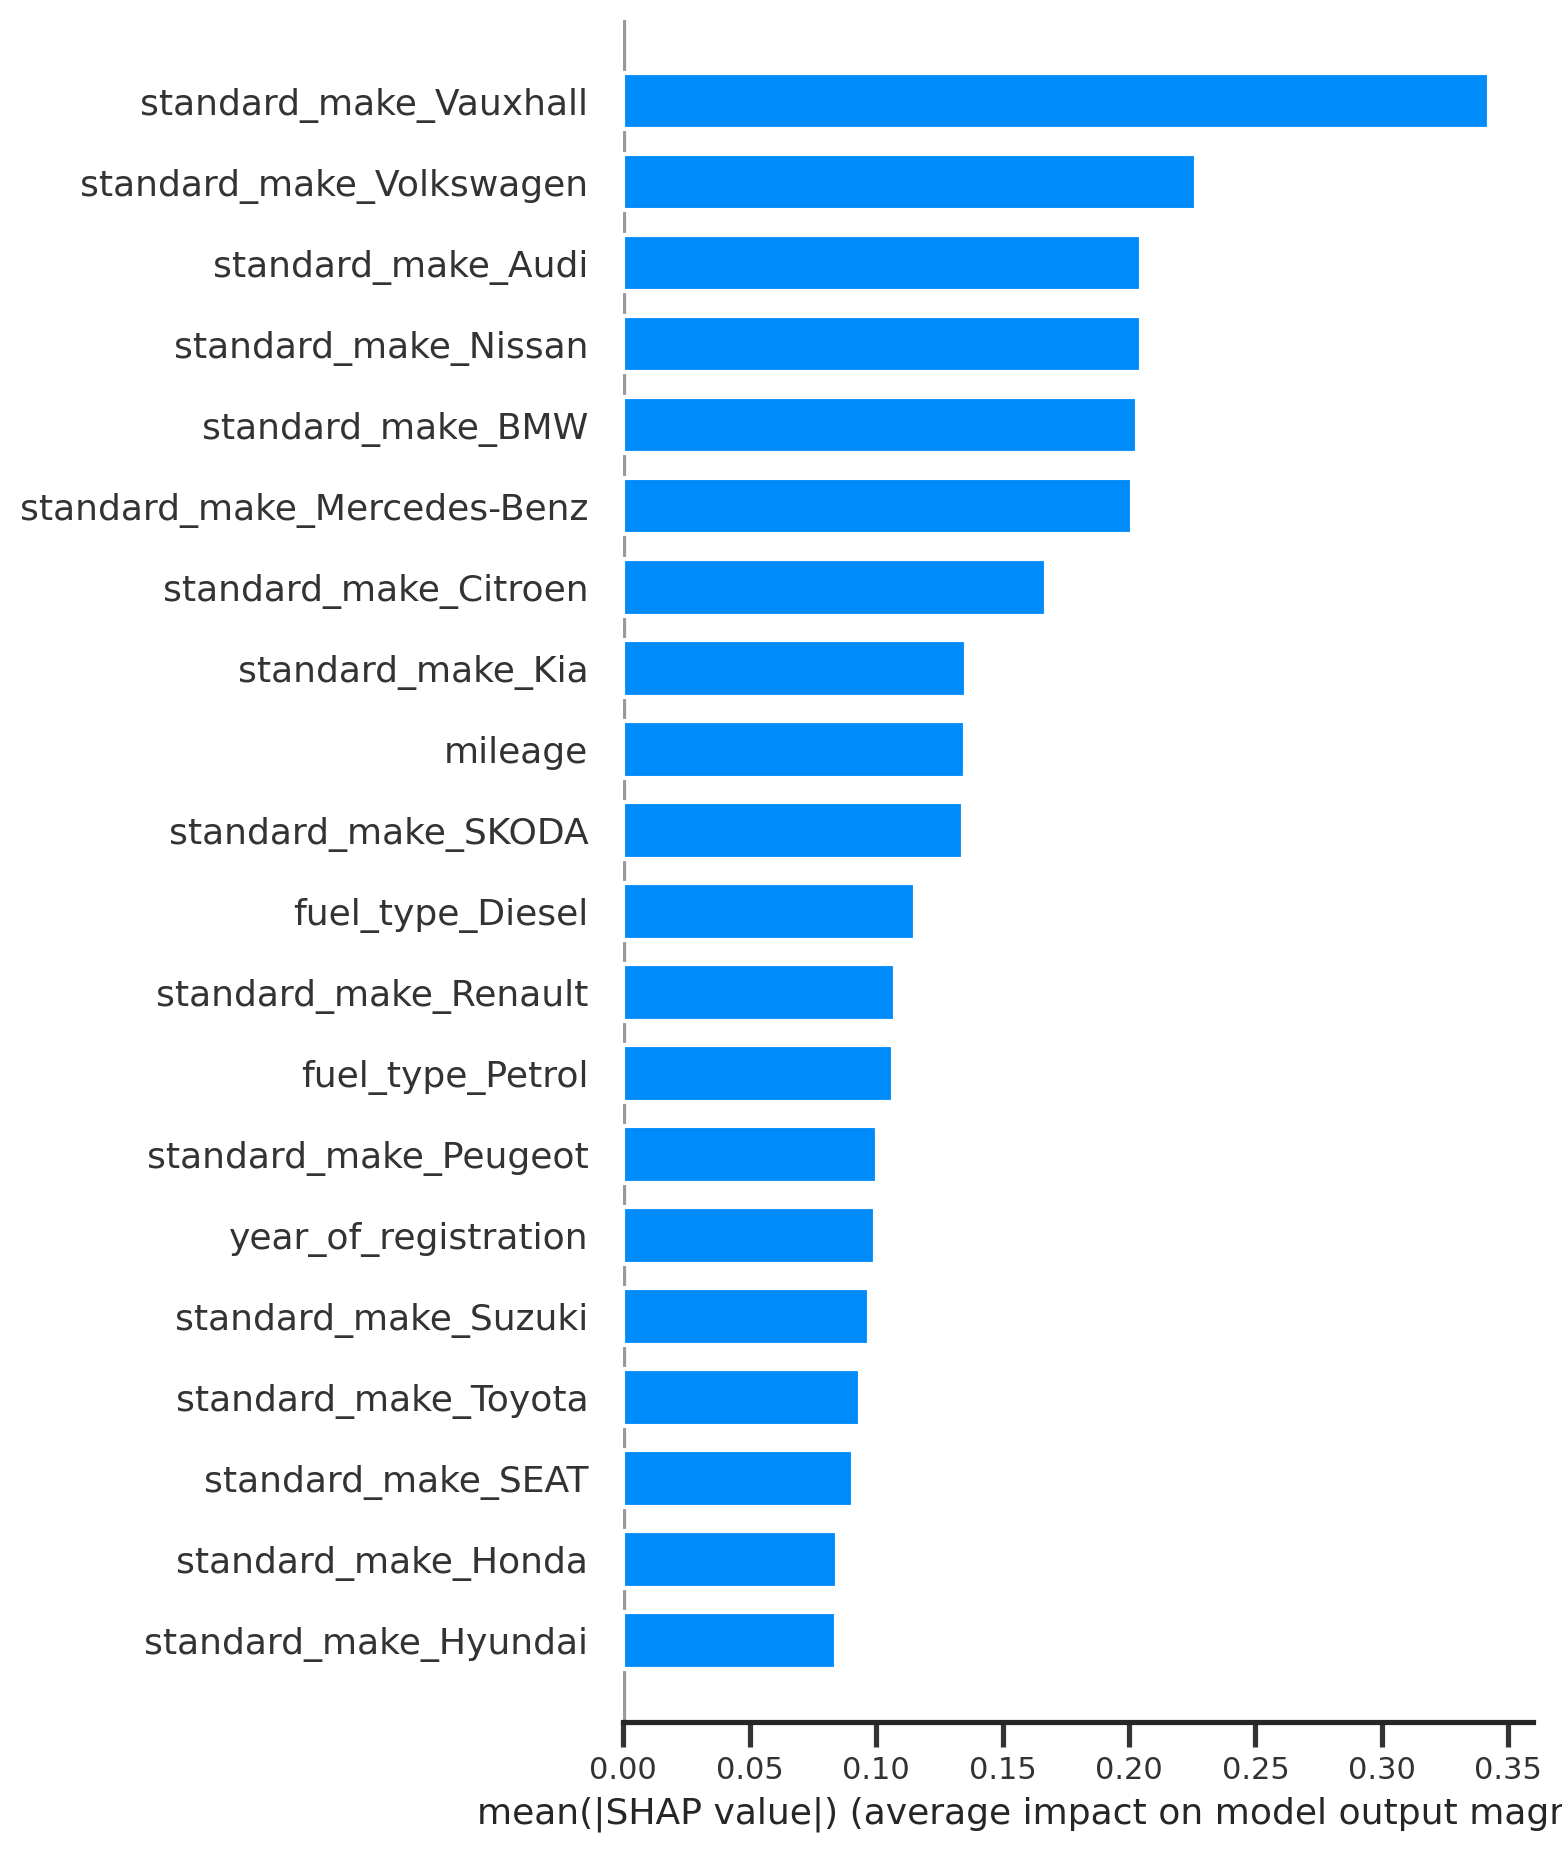

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


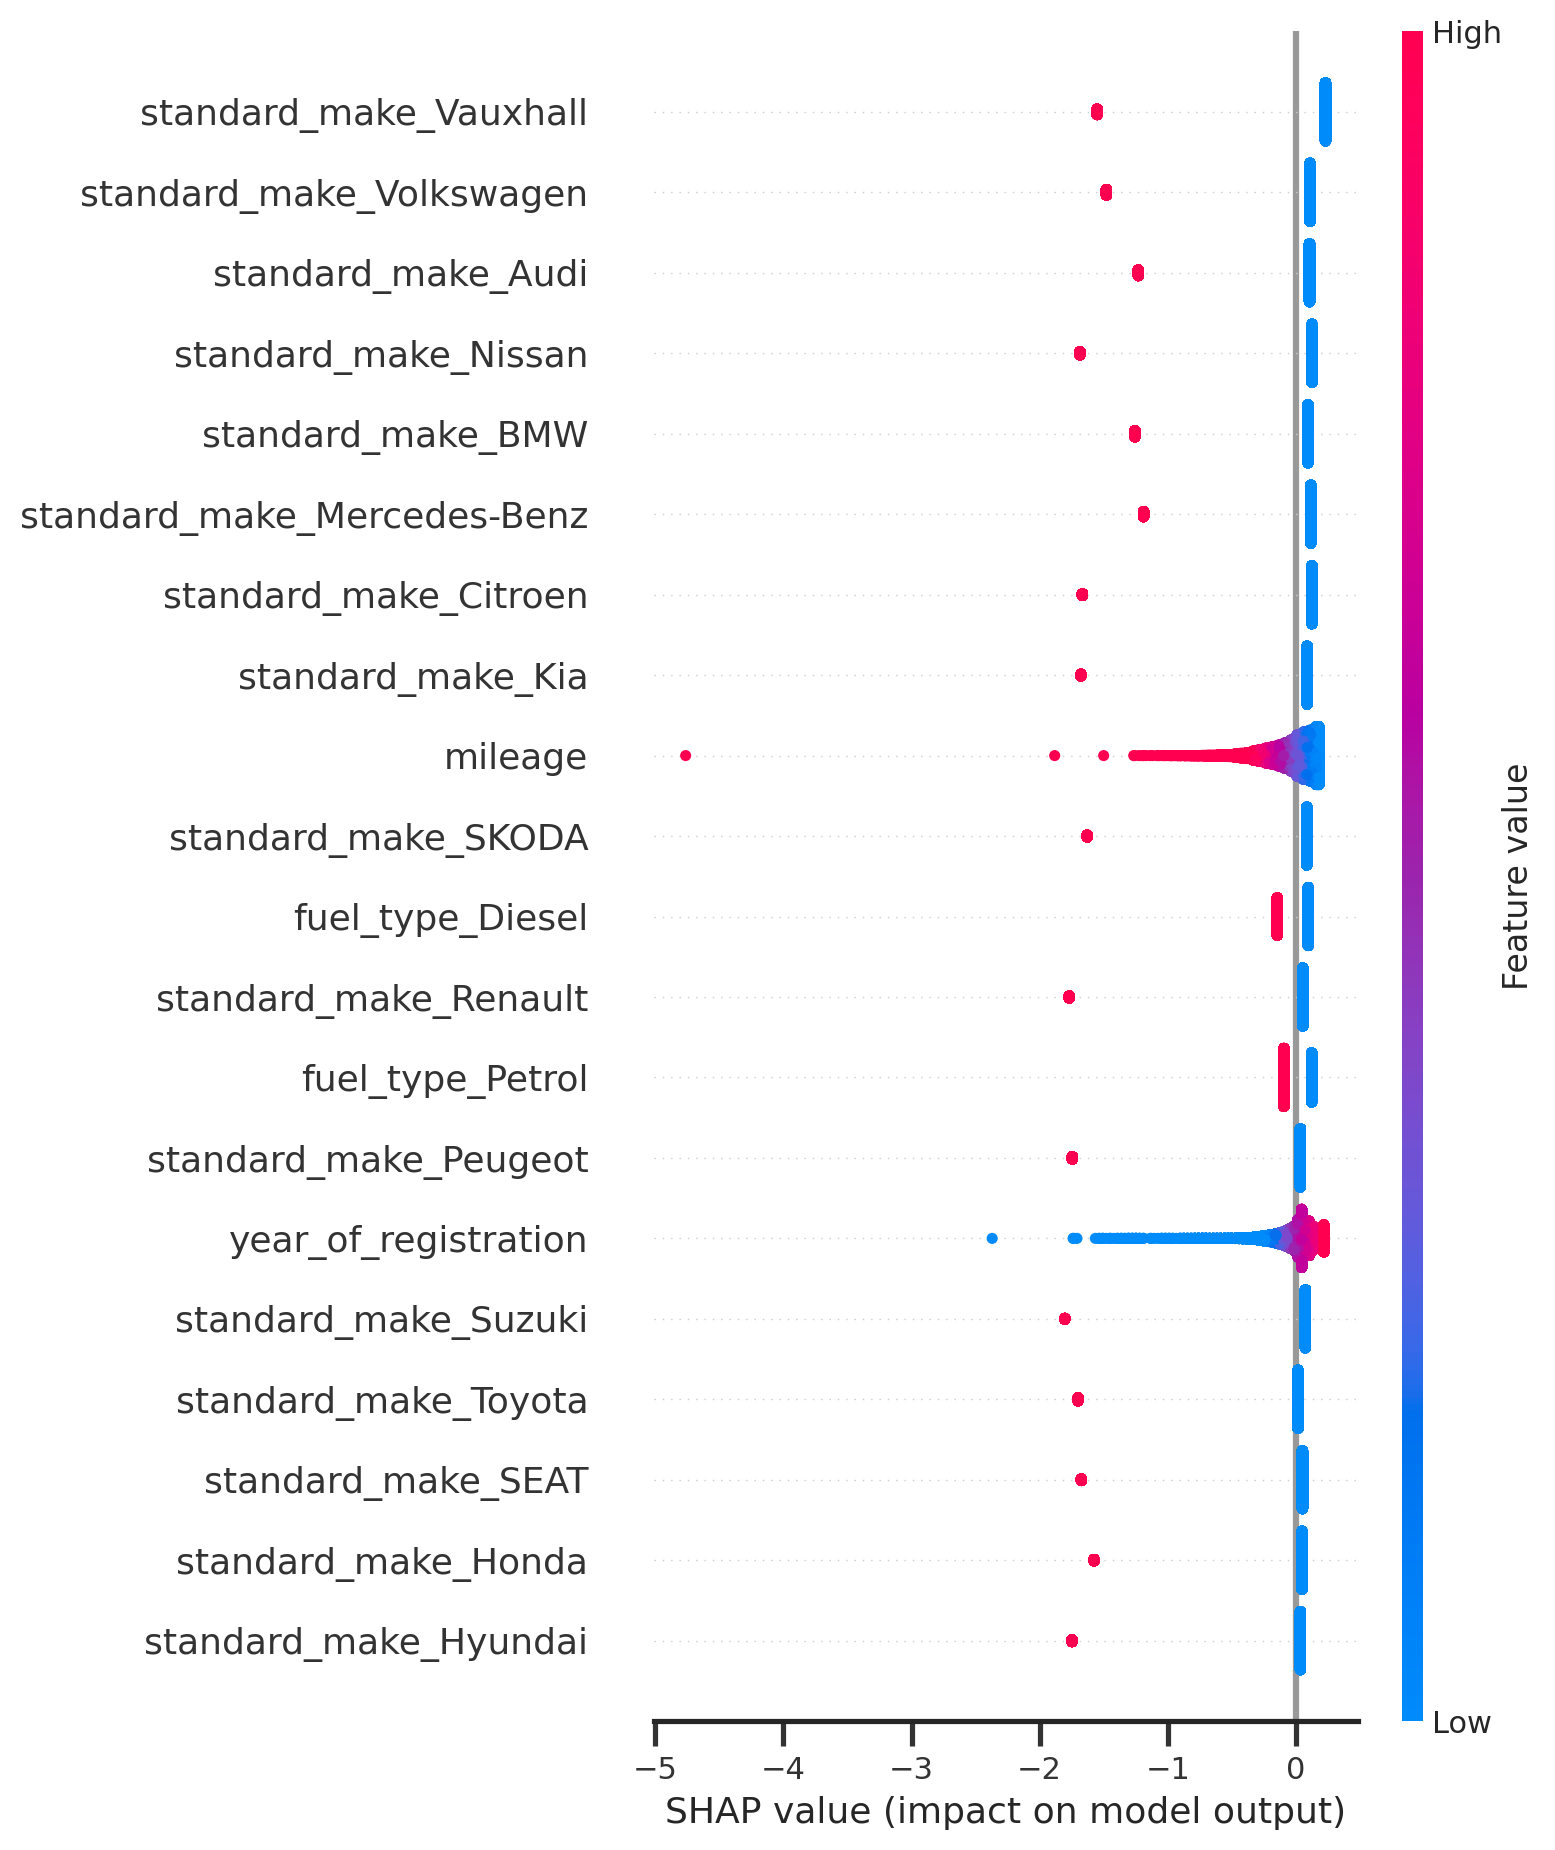

In [33]:
import shap
# model is your desired model that you want to show its shap values, X_train is the data that your model has been trained on
shap_values = shap.LinearExplainer(lr_model, X_train).shap_values(X_test)

# this line will plot the shap graph bar for the training data
shap.summary_plot(shap_values, X_test, plot_type="bar")

# plotting the usual shap graph
shap.summary_plot(shap_values, X_test)


**Partial Dependency Plots**

In [34]:
from sklearn.inspection import PartialDependenceDisplay

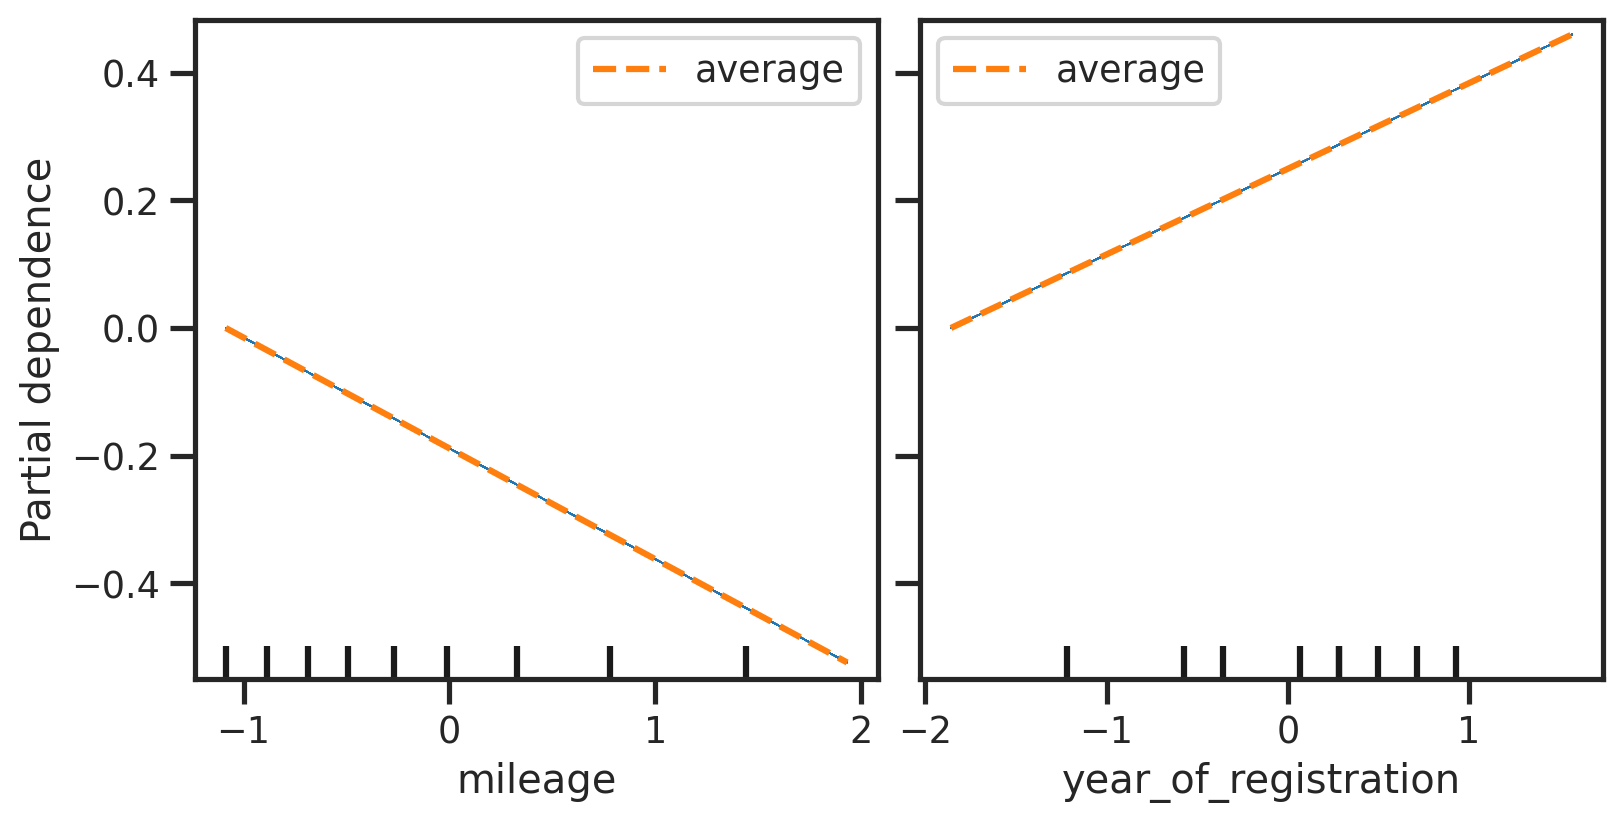

In [35]:
fig, ax = plt.subplots(figsize=(8,4), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    lr_model,X_test, features=['mileage', 'year_of_registration'], kind='both', centered=True,
    subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);


**ROUGH WORK**

In [36]:
# import shap
# #model is your desired model that you want to show its shap values, X_train is the data that your model has been trained on
# shap_values = shap.TreeExplainer(rf_model).shap_values(X_train) 

# #this line will plot the shap graph bar for the training data
# shap.summary_plot(shap_values, X_train, plot_type="bar")

# #plotting the usual shap graph
# shap.summary_plot(shap_values, X_train)

In [37]:
# # Compute SHAP values for each model
# lr_shap_values = shap.LinearExplainer(lr_model, X_train).shap_values(X_test)
# rf_shap_values = shap.TreeExplainer(rf_model).shap_values(X_test)
# gb_shap_values = shap.TreeExplainer(gb_model).shap_values(X_test)

# # Combine SHAP values across models
# combined_shap_values = np.concatenate((lr_shap_values, rf_shap_values, gb_shap_values), axis=1)

# # Plot summary plot for all three models
# shap.summary_plot(combined_shap_values, X_test, plot_type="bar")

In [38]:

# fig, ax = plt.subplots(figsize=(14,8), constrained_layout=True)
# PartialDependenceDisplay.from_estimator(
#     lr_model, X_test, features=X_test.select_dtypes(exclude='object').columns,
#     kind='both',
#     subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
#     ax=ax, n_cols=2


In [39]:
# import shap

# # Train the ensemble model on the full dataset
# predictions = []
# for model in models:
#     model.fit(X, y)
#     y_pred = model.predict(X)
#     predictions.append(y_pred)
# average_predictions = np.mean(predictions, axis=0)

# # Compute SHAP values for the ensemble model
# explainer = shap.Explainer(lr_model)
# shap_values = explainer(X)

# # Plot the global feature importances
# shap.plots.bar(shap_values.mean(0))

# # Plot the local feature importances for a single instance
# i = 0  # choose an instance to explain
# shap.plots.waterfall(shap_values[i], max_display=10)

# # Plot the dependence of predicted values on individual features
# shap.plots.scatter(shap_values[:, "LSTAT"], color=shap_values)

# # Plot the dependence of predicted values on pairs of features
# shap.plots.scatter(shap_values[:, ["LSTAT", "RM"]], color=shap_values)


In [40]:
# from pdpbox import pdp, get_dataset, info_plots

# # Create a function to plot partial dependence
# def plot_pdp(model, feature_name):
#     pdp_feature = pdp.pdp_isolate(
#         model=model, dataset=X_test, model_features=X_test.columns, feature=feature_name
#     )
#     fig, axes = pdp.pdp_plot(
#         pdp_feature,
#         feature_name,
#         plot_lines=True,
#         frac_to_plot=100,
#         plot_pts_dist=True,
#     )
#     _ = axes['pdp_ax'].set_xlabel(feature_name)
#     _ = axes['pdp_ax'].set_ylabel('Predicted Price')
#     _ = fig.suptitle(f'Partial Dependence Plot for {feature_name}')

# # Load the preprocessed dataset
# clean_df = pd.read_csv('cleaned_data.csv')

# # Split the data into training and testing sets
# X = clean_df.drop(['price'], axis=1)
# y = clean_df['price']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train a linear regression model on the training set
# lr_model = LinearRegression()
# lr_model.fit(X_train, y_train)

# # Plot partial dependence for each feature using LR
# for feature_name in X.columns:
#     plot_pdp(lr_model, feature_name)

# # Train a random forest regression model on the training set
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

# # Plot partial dependence for each feature using random forest
# for feature_name in X.columns:
#     plot_pdp(rf_model, feature_name)

# # Train a boosted tree regression model on the training set
# bt_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
# bt_model.fit(X_train, y_train)

# # Plot partial dependence for each feature using boosted trees
# for feature_name in X.columns:
#     plot_pdp(bt_model, feature_name)


In [41]:
# from sklearn.inspection import plot_partial_dependence
# fig, ax = plt.subplots(figsize=(8, 6))
# plot_partial_dependence(lr_model, X_train, ['mileage', 'year_of_registration'], ax=ax)
